In [31]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [32]:
data=pd.read_csv('/content/sample_data/PlayTennis.csv')

In [33]:
data

,Day,Outlook,Temperature,Humidity,Wind,Play Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
Le=LabelEncoder()

In [36]:
data['Outlook']=Le.fit_transform(data['Outlook'])
data['Temperature']=Le.fit_transform(data['Temperature'])
data['Humidity']=Le.fit_transform(data['Humidity'])
data['Wind']=Le.fit_transform(data['Wind'])
data['Play Tennis']=Le.fit_transform(data['Play Tennis'])

In [37]:
data

,Day,Outlook,Temperature,Humidity,Wind,Play Tennis
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [38]:
x=data.iloc[:,1:-1]
y=data['Play Tennis']

In [39]:
print(x,y)

    Outlook  Temperature  Humidity  Wind
0         2            1         0     1
1         2            1         0     0
2         0            1         0     1
3         1            2         0     1
4         1            0         1     1
5         1            0         1     0
6         0            0         1     0
7         2            2         0     1
8         2            0         1     1
9         1            2         1     1
10        2            2         1     0
11        0            2         0     0
12        0            1         1     1
13        1            2         0     0 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int64


In [40]:
model=tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

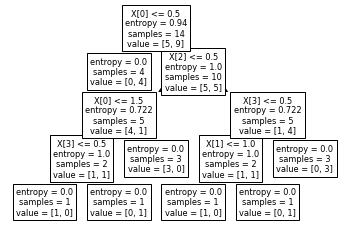

In [49]:
tree.plot_tree(model)

In [42]:
yp=model.predict(x)

In [43]:
yp

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [44]:
import graphviz as gv

In [45]:
gv_data=tree.export_graphviz(model,out_file=None,feature_names=data.columns[1:-1],class_names=['No','Yes'],filled=True,rounded=True,special_characters=True)

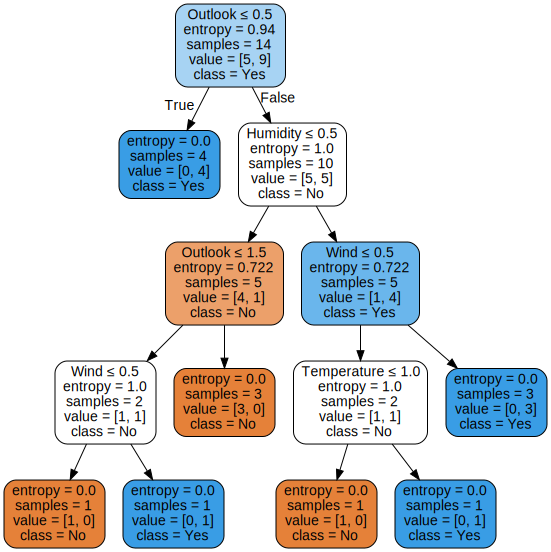

In [46]:
dt=gv.Source(gv_data)
dt